In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import geometric_brownian_motion as gbm

from European_Option import EuropeanOption
from Asian_Option import AsianOption
from American_Option import AmericanOption

# European Option Example

In [3]:
# Contract Parameters
# Initial Price
S0 = 100
# Strike Price
K = 105
# Years to Maturity
T = 1
# Risk Free Rate
r = 0.05
# Expected Return
mu = 0.05
# Volatility
sigma = 0.2
# GBM Discretization Steps
steps=100
# Number of Repetitions
reps=10000

In [4]:
european_call = EuropeanOption(contract='call',S0=S0,K=K,T=T,r=r,mu=mu,sigma=sigma,steps=steps,reps=reps)
print 'Black-Scoles Value:',european_call.BS_value()
print 'Simulated Value:',european_call.value

TypeError: __init__() got an unexpected keyword argument 'reps'

In [ ]:
european_put = EuropeanOption('put',S0=S0,K=K,T=T,r=r,mu=mu,sigma=sigma,steps=steps,reps=reps)
print 'Black-Scoles Value:',european_put.BS_value()
print 'Simulated Value:',european_put.value

In [5]:
european_call.final_price

NameError: name 'european_call' is not defined

In [6]:
european_put.final_price

NameError: name 'european_put' is not defined

In [7]:
european_call_price = european_call.final_price
european_call_payoff = np.maximum(0,european_call_price-K)

NameError: name 'european_call' is not defined

In [8]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.scatter(european_call_price,european_call_payoff)
# plt.xlabel('Delta')
# plt.ylabel('Derivative Value')
# plt.title('Boxplot of Derivative Estimation')
plt.show()

NameError: name 'european_call_price' is not defined

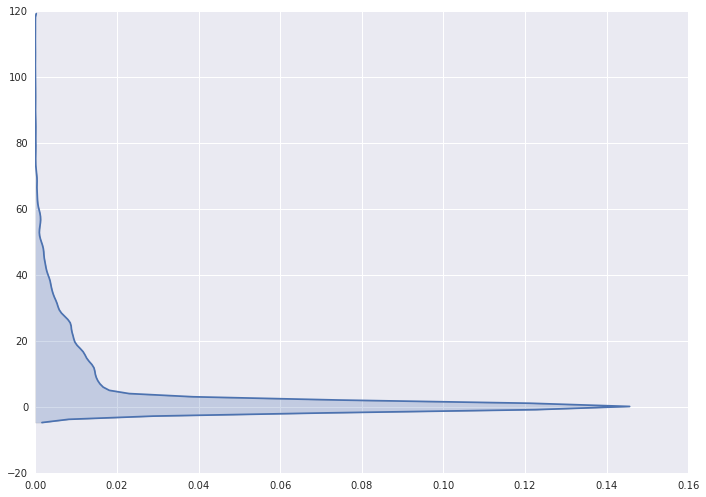

In [59]:
sns.kdeplot(european_call_payoff, shade=True, vertical=True)

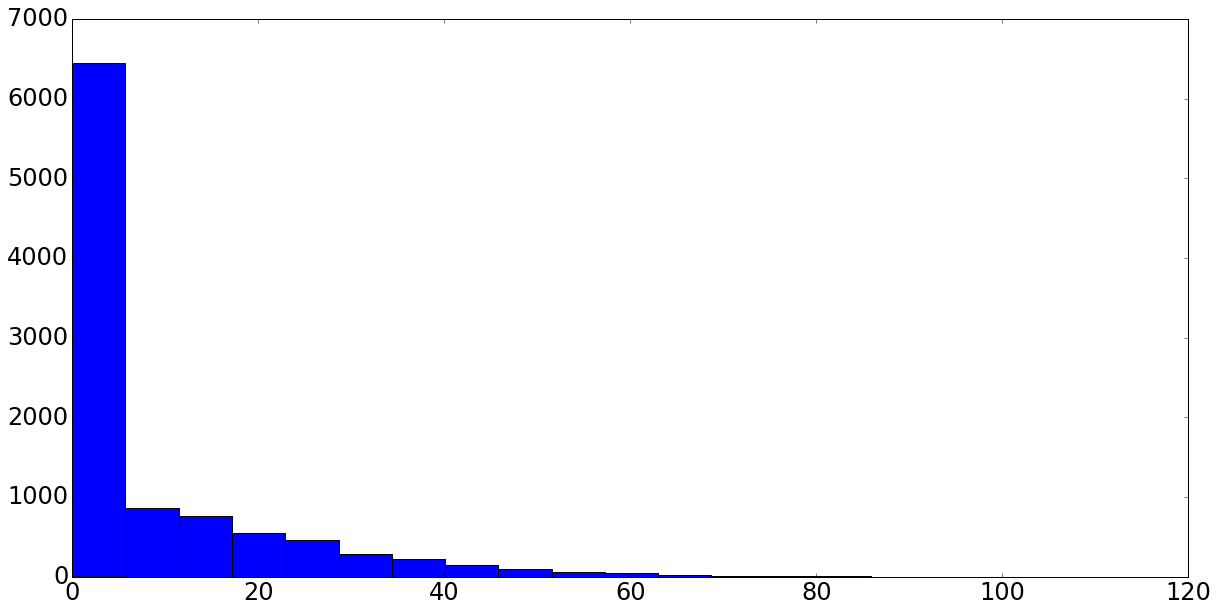

In [28]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.hist(european_call_payoff,bins=20)
plt.show()

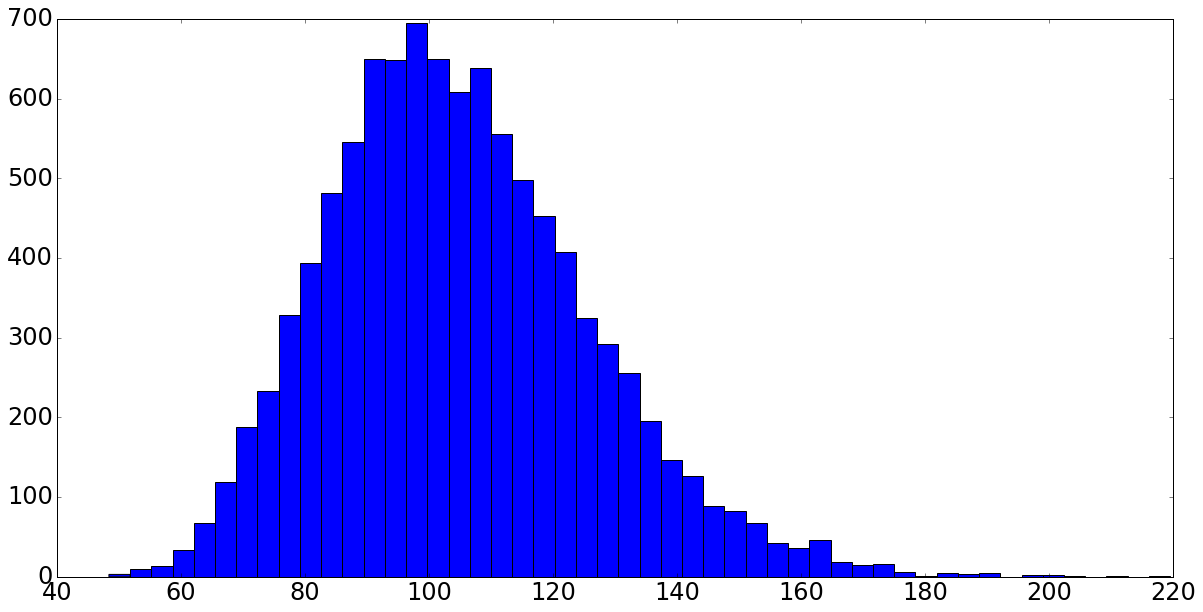

In [26]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.hist(european_call_price,bins=50)
plt.show()

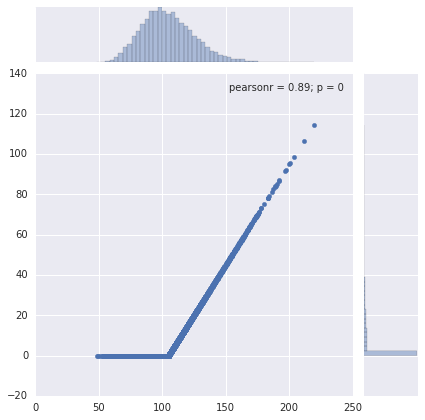

In [52]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot(european_call_price,european_call_payoff);

(0, 0.2)

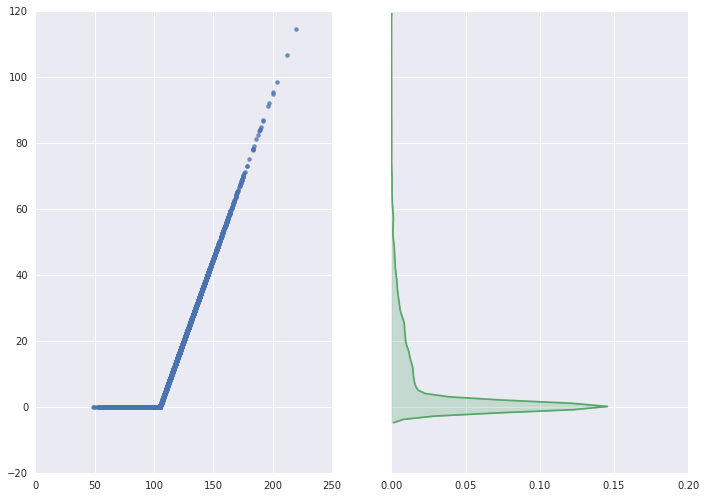

In [61]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.figure(figsize=(20,10))
# sns.rcParams.update({'font.size': 24})
# sns.kdeplot(european_call_price,european_call_payoff, shade=True)
# sns.regplot(european_call_price,european_call_payoff, fit_reg=False)
# sns.kdeplot(european_call_payoff, shade=True, vertical=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, sharex=False)
sns.regplot(european_call_price,european_call_payoff, fit_reg=False, ax=ax1)
temp = sns.kdeplot(european_call_payoff, shade=True, vertical=True, ax=ax2)
ax2.set_xlim(0,0.2)

In [18]:
stocks ={
    'A':{'S0':100, 'mu':0.05, 'sigma':0.1},
    'B':{'S0':50, 'mu':0.1, 'sigma':0.2},
    'C':{'S0':20, 'mu':0.08, 'sigma':0.12},
    'D':{'S0':80, 'mu':0.02, 'sigma':0.03},
    'E':{'S0':120, 'mu':0.05, 'sigma':0.2},
    }

In [20]:
T = 1
reps = 100
steps = 1000

for i,j in stocks.items():
#     print i,j
    stocks[i]['paths'] = gbm.BRW(stocks[i]['mu'],stocks[i]['sigma'],stocks[i]['S0'],T,reps,steps)

In [22]:
stocks

{'A': {'S0': 100,
  'mu': 0.05,
  'paths': array([[ 100.        ,   99.70458096,   99.94695049, ...,  107.75540892,
           107.93159824,  108.06012065],
         [ 100.        ,   99.30973567,   98.67182157, ...,  104.60309308,
           104.01862702,  104.23219097],
         [ 100.        ,   99.17710421,   99.61179204, ...,   93.76353286,
            93.55341423,   93.70141965],
         ..., 
         [ 100.        ,  100.19943522,  100.06440481, ...,  111.38322271,
           112.01179723,  111.96001403],
         [ 100.        ,   99.41766906,   99.87891174, ...,   98.89476929,
            98.62589889,   98.86842107],
         [ 100.        ,  100.37096615,  100.92597895, ...,  104.08181009,
           104.22014885,  104.19391494]]),
  'sigma': 0.1},
 'B': {'S0': 50,
  'mu': 0.1,
  'paths': array([[ 50.        ,  49.91149237,  50.03736664, ...,  46.22046976,
           46.19538387,  45.95599874],
         [ 50.        ,  49.59500755,  49.70072637, ...,  86.53224837,
         

In [4]:
%matplotlib inline
class Portfolio_1(object):
    '''
    Class to track value of stock/option portfolio on single underlying asset
    S0 - cost of underlying stock at time 0
    
    '''
    def __init__(self, S0, r, mu, sigma, T, reps, steps):
        self.S0 = float(S0)
        self.r = r
        self.T = T
        self.num_stocks = 0
        self.put_payoff = np.zeros(reps)
        self.call_payoff = np.zeros(reps)
        self.cost = 0
        self.paths = gbm.BRW(mu,sigma,S0,T,reps,steps)
    def add_stock(self,num_stocks,sense='long'):
        if sense == 'long':
            self.cost += num_stocks*self.S0
            self.num_stocks += num_stocks
        elif sense == 'short':
            self.cost -= num_stocks*self.S0
            self.num_stocks -= num_stocks
        
    def add_put(self,num,K,T,r,mu,sigma,sense='buy',op_type='european',**exercise):
        if op_type == 'european':
            put = EuropeanOption(contract='put',S0=self.S0,K=K,T=T,r=r,mu=mu,sigma=sigma,paths=self.paths)
        elif op_type == 'asian':
            put = AsianOption(contract='put',S0=self.S0,K=K,T=T,r=r,mu=mu,sigma=sigma,paths=self.paths)
        elif op_type =='american':
            put = AmericanOption(contract='put',S0=self.S0,K=K,T=T,r=r,mu=mu,sigma=sigma,paths=self.paths,exercise=exercise)
        
        if sense=='buy':
            self.cost += num*put.value[0]
            self.put_payoff = self.put_payoff + np.multiply(num,put.values)
            
        elif sense=='sell':
            self.cost -= num*put.value[0]
            self.put_payoff = self.put_payoff - np.multiply(num,put.values)
    
    def add_call(self,num,K,T,r,mu,sigma,sense='buy',op_type='european',**exercise):
        if op_type == 'european':
            call = EuropeanOption(contract='call',S0=self.S0,K=K,T=T,r=r,mu=mu,sigma=sigma,paths=self.paths)
        elif op_type == 'asian':
            call = AsianOption(contract='call',S0=self.S0,K=K,T=T,r=r,mu=mu,sigma=sigma,paths=self.paths)
        elif op_type =='american':
            call = AmericanOption(contract='call',S0=self.S0,K=K,T=T,r=r,mu=mu,sigma=sigma,paths=self.paths,exercise=exercise)
        
        if sense=='buy':
            self.cost += num*call.value[0]
            self.call_payoff = self.call_payoff + np.multiply(num,call.values)
        
        elif sense=='sell':
            self.cost -= num*call.value[0]
            self.call_payoff = self.call_payoff - np.multiply(num,call.values)
    
    def net_value(self):
        self.closing_price = self.paths[:,-1]
        self.stock_value = np.exp(-self.r*self.T)*self.closing_price*self.num_stocks
        self.put_value = self.put_payoff
        self.call_value = self.call_payoff
        self.net = self.stock_value + self.put_value + self.call_value - self.cost
        return self.net
    
    def plot(self):
        x = self.paths[:,-1]
        y = self.net_value()
        
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, sharex=False)
        sns.regplot(x,y, fit_reg=False, ax=ax1)
        sns.kdeplot(y, shade=True, vertical=True, ax=ax2)
        ax2.set_xlim(0,0.1)
#         ax2.autoscale(enable=True, axis='both', tight=None)

# Long 1 stock

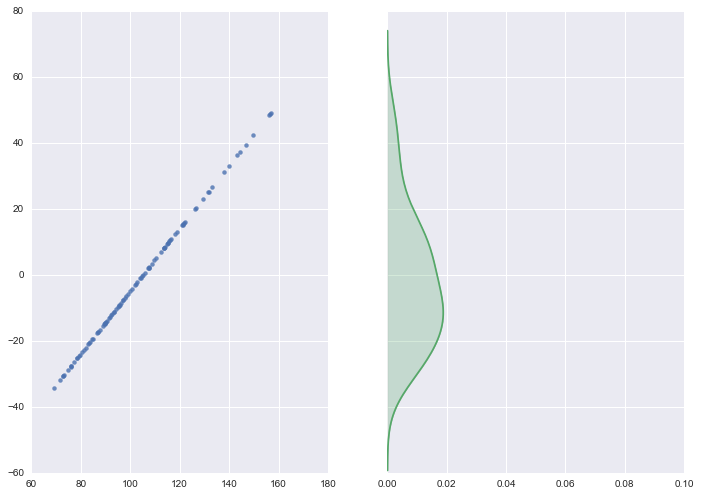

In [19]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_stock(1)
portf.plot()

# Short 1 stock

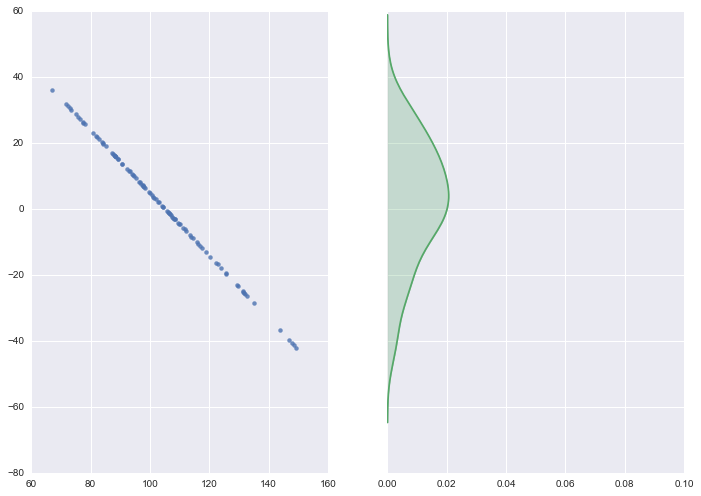

In [20]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_stock(num_stocks=1, sense='short')
portf.plot()

# Long 1 Call option

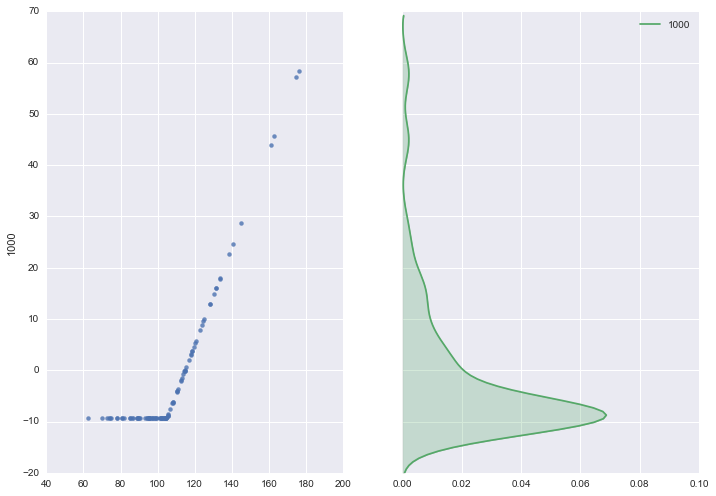

In [5]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_call(num=1,K=105,T=1,r=0.05,mu=0.05,sigma=0.2, sense='buy', op_type='american', exercise=0.5)
portf.plot()

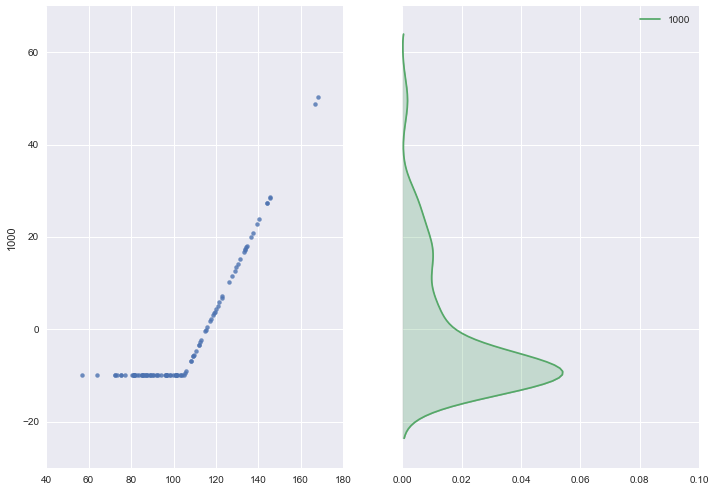

In [6]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_call(num=1,K=105,T=1,r=0.05,mu=0.05,sigma=0.2, sense='buy', op_type='american', exercise=1)
portf.plot()

# Short 1 Call Option

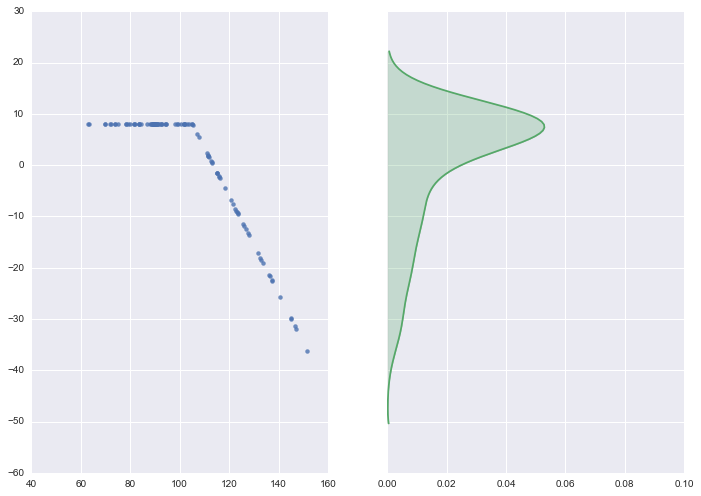

In [22]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_call(num=1,K=105,T=1,r=0.05,mu=0.05,sigma=0.2, sense='sell')
portf.plot()

# Long 1 Put Option

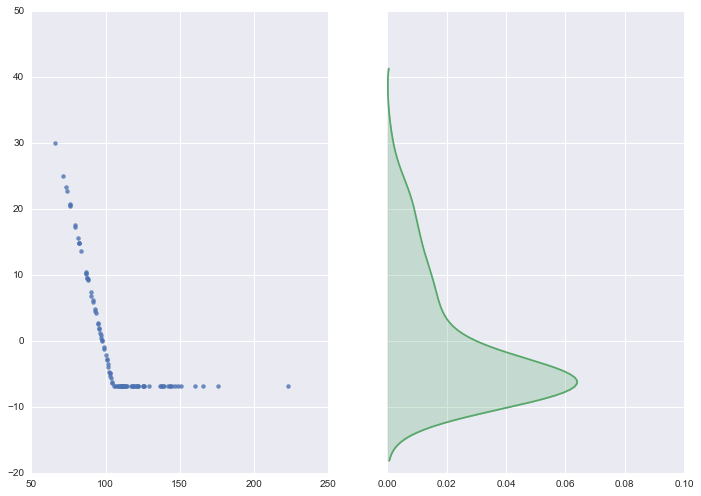

In [23]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_put(num=1,K=105,T=1,r=0.05,mu=0.05,sigma=0.2, sense='buy')
portf.plot()

# Short 1 Put Option

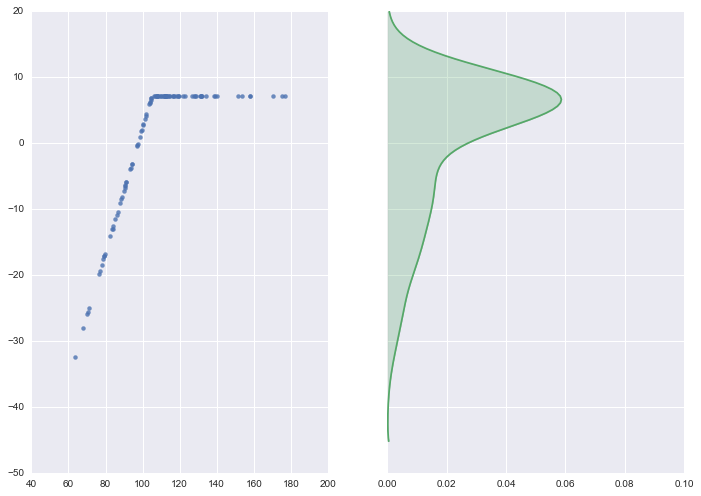

In [24]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_put(num=1,K=105,T=1,r=0.05,mu=0.05,sigma=0.2, sense='sell')
portf.plot()

# Covered Call

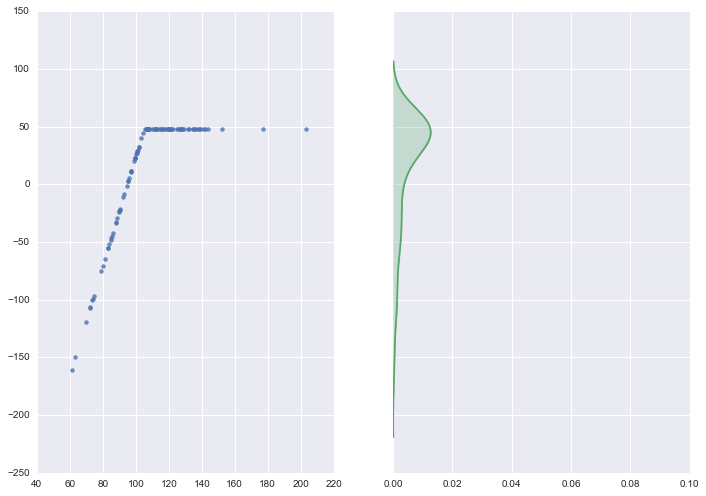

In [25]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_stock(5)
portf.add_call(num=5,K=105,T=1,r=0.05,mu=0.05,sigma=0.2, sense='sell')
portf.plot()

# Married Put

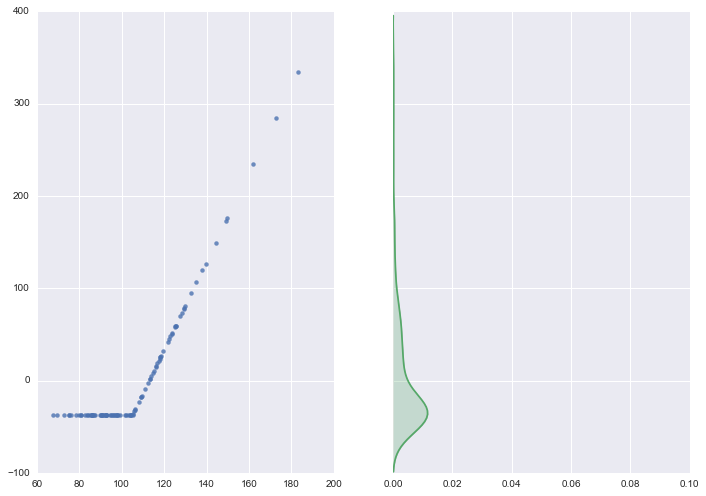

In [26]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_stock(5)
portf.add_put(num=5,K=105,T=1,r=0.05,mu=0.05,sigma=0.2, sense='buy')
portf.plot()

# Bull Call Spread

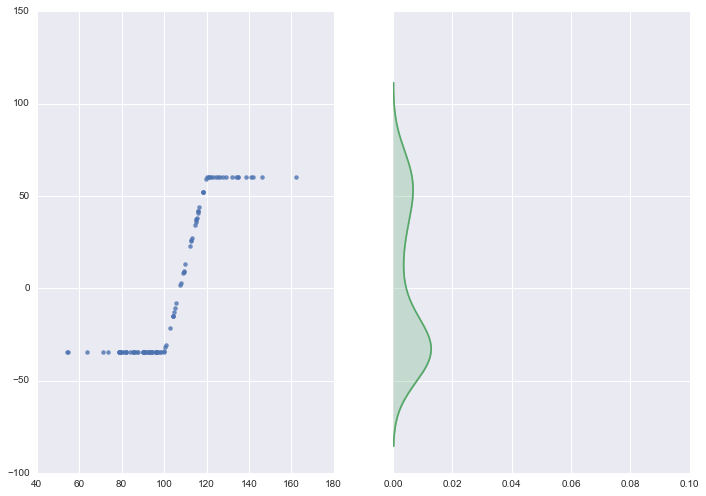

In [27]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_call(num=5,K=100,T=1,r=0.05,mu=0.05,sigma=0.2, sense='buy')
portf.add_call(num=5,K=120,T=1,r=0.05,mu=0.05,sigma=0.2, sense='sell')
portf.plot()

# Bear Put Spread

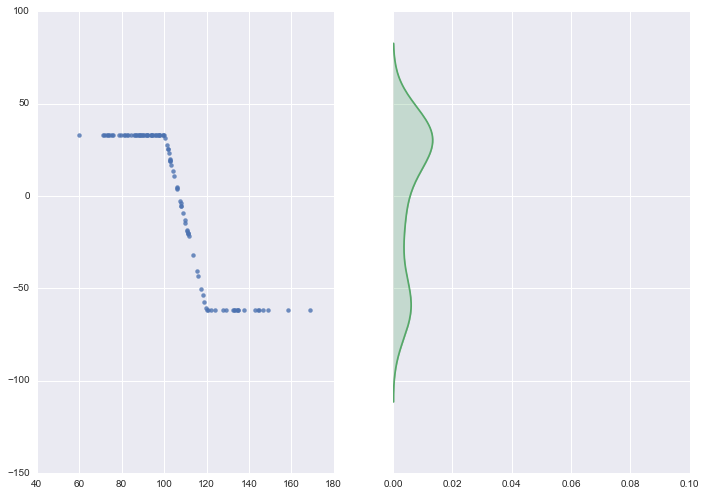

In [28]:
portf = Portfolio_1(S0=100,r=0.05, mu=0.05, sigma=0.2, T=1, reps=100, steps=1000)
portf.add_put(num=5,K=120,T=1,r=0.05,mu=0.05,sigma=0.2, sense='buy')
portf.add_put(num=5,K=100,T=1,r=0.05,mu=0.05,sigma=0.2, sense='sell')
portf.plot()

In [29]:
portf.net_value()

array([ 33.09639598,  33.09639598, -62.02654647,  33.09639598,
        18.99250929,  33.09639598,  -5.25518043, -62.02654647,
        23.20271669, -20.3906423 ,  33.09639598,  27.56750035,
        33.09639598, -62.02654647,  33.09639598, -50.56444402,
        33.09639598,  33.09639598, -19.1341971 ,  33.09639598,
        33.09639598,  -3.65116546,   3.89162974, -62.02654647,
       -62.02654647,  25.46657858, -62.02654647,  33.09639598,
        33.09639598, -62.02654647,  33.09639598, -62.02654647,
       -13.28300017,  33.09639598,  33.09639598,  32.93279207,
       -62.02654647,  33.09639598, -62.02654647,  16.90792148,
        33.09639598,  -9.14394771,  20.11097136, -62.02654647,
        18.87491437,  33.09639598,  33.09639598, -62.02654647,
        33.09639598,  33.09639598,  13.59567916,  33.09639598,
       -43.58043869,  33.09639598,  10.78741747,  -5.63579486,
       -19.87983946,  33.09639598,  33.09639598,  33.09639598,
        31.37713611,  33.09639598, -62.02654647,  33.09

# Asian Option Example

In [12]:
asian_call = AsianOption(contract='call',S0=S0,K=K,T=T,r=r,mu=mu,sigma=sigma,steps=steps,reps=reps)
print 'Simulated Value:',asian_call.value

Simulated Value: (3.641066621433005, 0.12894877348533315)


In [13]:
asian_put = AsianOption('put',S0=S0,K=K,T=T,r=r,mu=mu,sigma=sigma,steps=steps,reps=reps)
print 'Simulated Value:',asian_put.value

Simulated Value: (5.7298077775416507, 0.13393078810069903)


In [14]:
asian_call.final_price

array([ 146.79853218,   79.5614999 ,   84.23704083, ...,   96.71906657,
         86.62104594,  121.11513449])

In [15]:
asian_put.final_price

array([ 101.29453315,   82.04286994,  143.84172973, ...,   96.78984241,
        116.86138623,  122.62698757])

# American Option Example

In [19]:
test_call = AmericanOption(contract='call',S0=100,K=105,T=1,r=0.05,mu=0.05,sigma=0.2,steps=100,reps=1000)
print 'Simulated Value:',test_call.value

Simulated Value: (7.738233383506949, 0.76077947591762196)


In [13]:
test_put = AmericanOption('put',100,105,1,0.05,0.05,0.2,100,10000)
print 'Simulated Value:',test_put.value

/Users/Jonathan/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Simulated Value: (8.6919432810766306, 0.15438164862196208)
